# <center> Scientific Programming with Python
## <center> Assignment: Planet Satellites

**Author:** Patrick Metz (pmetz2s; 9033945)  
**Date:** June 4th, 2021

#### Task 1
*Goal*: use pandas library to import satellite data from four given csv files into a single 
dataframe, while removing incomplete rows and adding a planet name column. The files 
contain the following data about the satellites of Saturn, Jupiter, Uranus and Earth:

| satellite attribute (measure) | data type<sup>1</sup> | least sig figs | least decimals | meaning |
| :--- | :--- | :--- | :--- | :--- |
| Name | string | n.a. | n.a. | satellite's name|
| Semimajor Axis (km) | float | 6 | 5 | orbital diameter of path's major axis|
| Period (days) | float | 3 | 2 | time for one orbit around the planet |
| Eccentricity | float | 1 | 2 |  circularity of orbit, between 0 (circle) and 1 (ellipse) |
| Inclination (deg) | float | 1 | 2 | tilt of orbit |
| Mean Diameter (km) | float | 2 | 1 | average size |
| Mass (kg) | float | 2 | 1 |  weight |

<sup>__1__</sup>: For the given csv files pandas correctly determines appropriate data 
types. So no extra conversion is needed.

In [16]:
import pandas as pd

satellites = pd.DataFrame()
csv_files = {"Earth": 'earth_satellites.csv', "Jupiter": 'jupiter_satellites.csv',
             "Saturn": 'saturn_satellites.csv', "Uranus": 'uranus_satellites.csv'}

for (planet_name, csv_file) in csv_files.items():
    data_frame = pd.read_csv(csv_file).dropna()                   # only read in complete data
    data_frame["Planet"] = planet_name
    satellites = satellites.append(data_frame, ignore_index=True) # append with consistent index

#### Task 2
*Goal*: identify the largest and smallest satellite diameters from the planet data.

In [17]:
diameter = satellites["Mean Diameter (km)"]

print("Concerning diameter...")
print("...the smallest satellite is %.1f km." % diameter.min()) # round for least numerical info
print("...the largest satellite is %.1f km." % diameter.max())

Concerning diameter...
...the smallest satellite is 2.8 km.
...the largest satellite is 10536.4 km.


#### Task 3
###### Goal

Create a correlation matrix, based on Pearson's method, of the planet data's 
numerical columns. Also comment on the correlation between the semimajor axis and the 
orbital period. 

###### Comment
The resulting correlation coefficient between the two mentioned attributes 
reaching 1, indicates a strong positive linear dependency between those. This statistically 
shows, that one of the attributes grows, when the other one grows and that it shrinks when 
the other one shrinks. Or bluntly put: the bigger/smaller the semimajor axis, the 
longer/shorter the orbital period.

###### Pearson's correlation coefficient
Is applied to each pair of columns
([Source: Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Definition)):

$ {\displaystyle \rho _{X,Y}={\frac {\operatorname {\mathbb {E} } 
  [(X-\mu _{X})(Y-\mu _{Y})]}{\sigma _{X}\sigma _{Y}}}} $

###### Source Code
https://stackoverflow.com/q/12725417

In [18]:
# only use numerical data and round according to least available amount of numerical information
matrix = satellites.select_dtypes("number").corr(method="pearson").round(1) 
matrix

,Semimajor Axis (km),Period (days),Eccentricity,Inclination (deg),Mean Diameter (km),Mass (kg)
Semimajor Axis (km),1.0,1.0,0.9,1.0,0.0,-0.0
Period (days),1.0,1.0,0.9,1.0,-0.1,-0.1
Eccentricity,0.9,0.9,1.0,0.9,-0.1,0.1
Inclination (deg),1.0,1.0,0.9,1.0,-0.1,-0.1
Mean Diameter (km),0.0,-0.1,-0.1,-0.1,1.0,0.7
Mass (kg),-0.0,-0.1,0.1,-0.1,0.7,1.0


#### Task 4
Goal: plot bar graphs, containing the satellites' names on the x-axis, and their mass and
mean diameter on the y-axis.

array([<AxesSubplot:title={'center':'Mass (kg)'}, xlabel='Name'>,
       <AxesSubplot:title={'center':'Mean Diameter (km)'}, xlabel='Name'>],
      dtype=object)

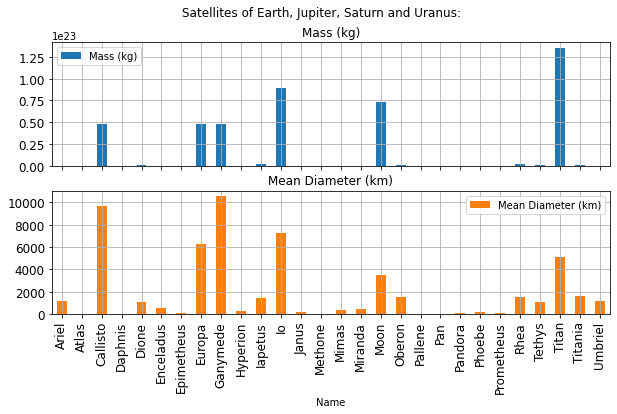

In [19]:
satellites.sort_values(by=["Name"]).plot(                     # plot sorted for usability
    title="Satellites of Earth, Jupiter, Saturn and Uranus:",
    x="Name", y=["Mass (kg)", "Mean Diameter (km)"],
    kind="bar", 
    grid=True,
    subplots=True,                                            # show plot for each y-axis
    figsize=(10,5),                                           # set size for readability
    fontsize=12)        

#### Task 5
*Goal*: sort the satellites' data according to their orbital periods.

In [20]:
satellites = satellites.sort_values(by=["Period (days)"])

#### Task 6
*Goal*: store the satellite data's current state into a csv file.

In [21]:
satellites.to_csv("./satellites_sorted_by_period.csv", index=False) # don't save index column